In [32]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
from matplotlib import colors
from scipy import stats
import statistics
from scipy.optimize import curve_fit
import pwlf


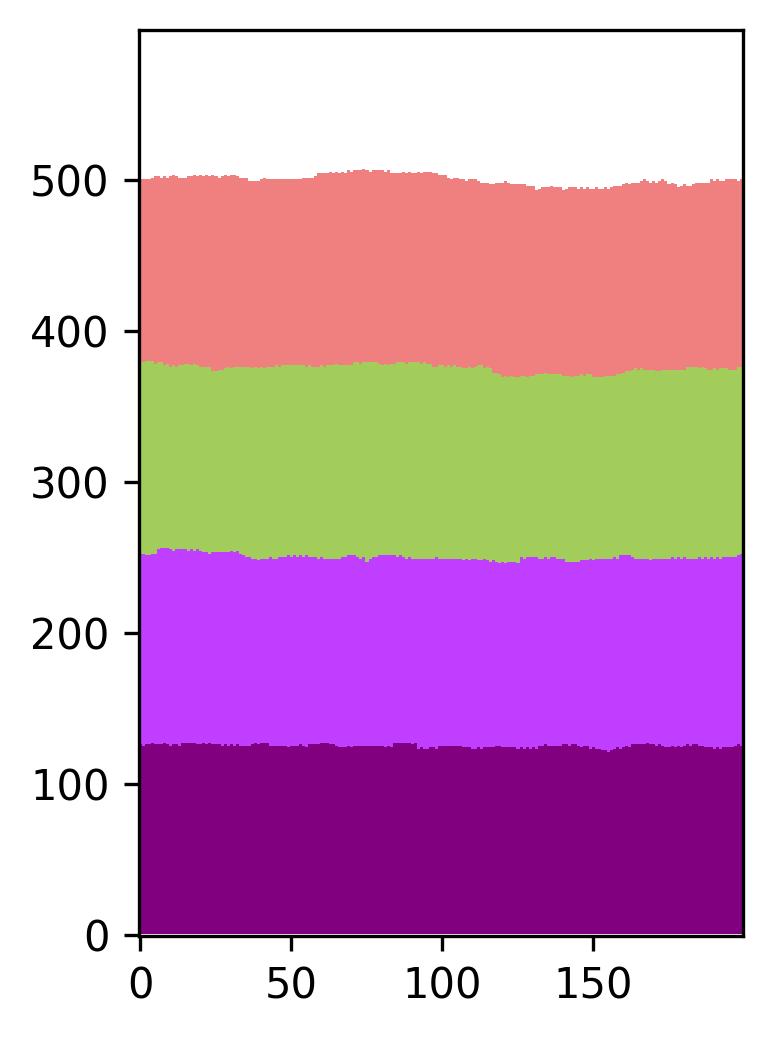

In [74]:
t = 100000
L = 200 
h = np.zeros(L, dtype=int)
image_array = np.zeros((600,200),dtype=int)

plt.figure(dpi=300)

colorlist = colors.ListedColormap(['white','purple','#BF3EFF','#A2CD5A','#F08080'])
for i in range(t):

    color_i = ((i//(t//4)))+1                                     #dedicating different colors from colorlist for each 2500 squares
    x = rnd.randint(0,199)                                      #choosing a random number betweeen 0 and 199 (h imdex goes from 0 to 199)
             
    if h[x-199] == h[x-200] and h[x-199] == h[x-198]:           #considering boundary conditions and letting the snowflakes sit in the lowest neighbor
        position = x-199
    elif h[x-199]<h[x-200] and h[x-199]<h[x-198]: 
        position = x-199  
    elif h[x-200] < h[x-198]:
        position = x-200
    elif h[x-200]> h[x-198]:
        position = x-198
    elif h[x-200] == h[x-198]:
        y = rnd.randint(0,1)
        if y == 0:
            position = x-200
        else:
            position = x-198

    h[position] += 1             
    image_array[h[position]][position] = color_i                #building and array of the cells where imshow functions is going to color.
      
plt.imshow(image_array ,cmap = colorlist,interpolation='none', origin = 'lower' ) #coloring the specified cells in image_array with specified colors
   
    
ax = plt.gca()
ax.set_aspect(aspect=0.5)
plt.savefig('lowsit', dpi=300)
plt.show()   

 Data

In [73]:
t = 2000000
L = 200
h = np.zeros(L, dtype=int)
steps = t//100
mean_number = 100               # Repeating the whole process for mean_number and make mean_numbers of lists consisting the variances.
w = np.zeros((t//steps))        # Calculating the variance in each process for t//steps times.
listofw = np.zeros((t//steps,mean_number)) 
listofmean = np.zeros(t//steps)


for j in range(mean_number):
    h = np.zeros(L, dtype=int)
    for i in range(t):

        x = rnd.randint(0,199)                                      #choosing a random number betweeen 0 and 199 (h imdex goes from 0 to 199)
             
        if h[x-199] == h[x-200] and h[x-199] == h[x-198]:           #considering boundary conditions and letting the snowflakes sit in the lowest neighbor
            position = x-199
        elif h[x-199]<h[x-200] and h[x-199]<h[x-198]: 
            position = x-199  
        elif h[x-200] < h[x-198]:
            position = x-200
        elif h[x-200]> h[x-198]:
            position = x-198
        elif h[x-200] == h[x-198]:
            y = rnd.randint(0,1)
            if y == 0:
                position = x-200
            else:
                position = x-198

        h[position] += 1             

      
        #if i%(steps) == 0 and i!=0:                                        #setting steps for calculating mean and stadard deviation

            #listofmean[i//steps] = (i/L)*(i/L)                                       #calculating mean  

            #listofw[i//steps][j] = np.var(h)                                #calculating standard deviation


 

<Figure size 1800x1200 with 0 Axes>

In [65]:
meanofw = [np.mean(listofw[i][:]) for i in range(t//steps)]        #calculating mean of 100(mean_number) standard deviations.
meanofw

[0.0,
 3.265275,
 4.6354750000000005,
 5.2684750000000005,
 5.672674999999999,
 5.9543750000000015,
 6.476774999999999,
 6.236475,
 6.2311749999999995,
 6.251175,
 6.687174999999999,
 7.460275,
 6.704574999999998,
 6.636674999999999,
 6.833975000000001,
 6.764175,
 7.540775,
 7.1969749999999975,
 7.532175,
 7.7410749999999995,
 7.831075000000001,
 8.029375000000002,
 7.524274999999999,
 7.570075,
 7.238874999999998,
 7.5958749999999995,
 7.646474999999998,
 7.9022749999999995,
 6.787874999999999,
 7.089975000000001,
 7.026074999999999,
 7.437675,
 7.541275,
 7.470474999999999,
 7.048774999999998,
 7.057374999999999,
 7.390374999999999,
 7.716075000000001,
 7.4419749999999985,
 7.453574999999998,
 7.281374999999998,
 7.418475,
 7.424575,
 7.541575,
 7.753274999999999,
 7.546175000000001,
 7.569875,
 7.911174999999998,
 7.821375,
 7.1378749999999975,
 7.111675,
 7.182675000000001,
 8.026175,
 7.974975,
 7.850474999999999,
 7.525374999999998,
 7.5516749999999995,
 7.121074999999999,
 6.74

No handles with labels found to put in legend.


start and end x of fitted lines are:[4.60643533 5.55787746 6.30103   ]
the slopes fitted lines are:[0.18700308 0.0190529 ]
y of break point is[0.86783593]


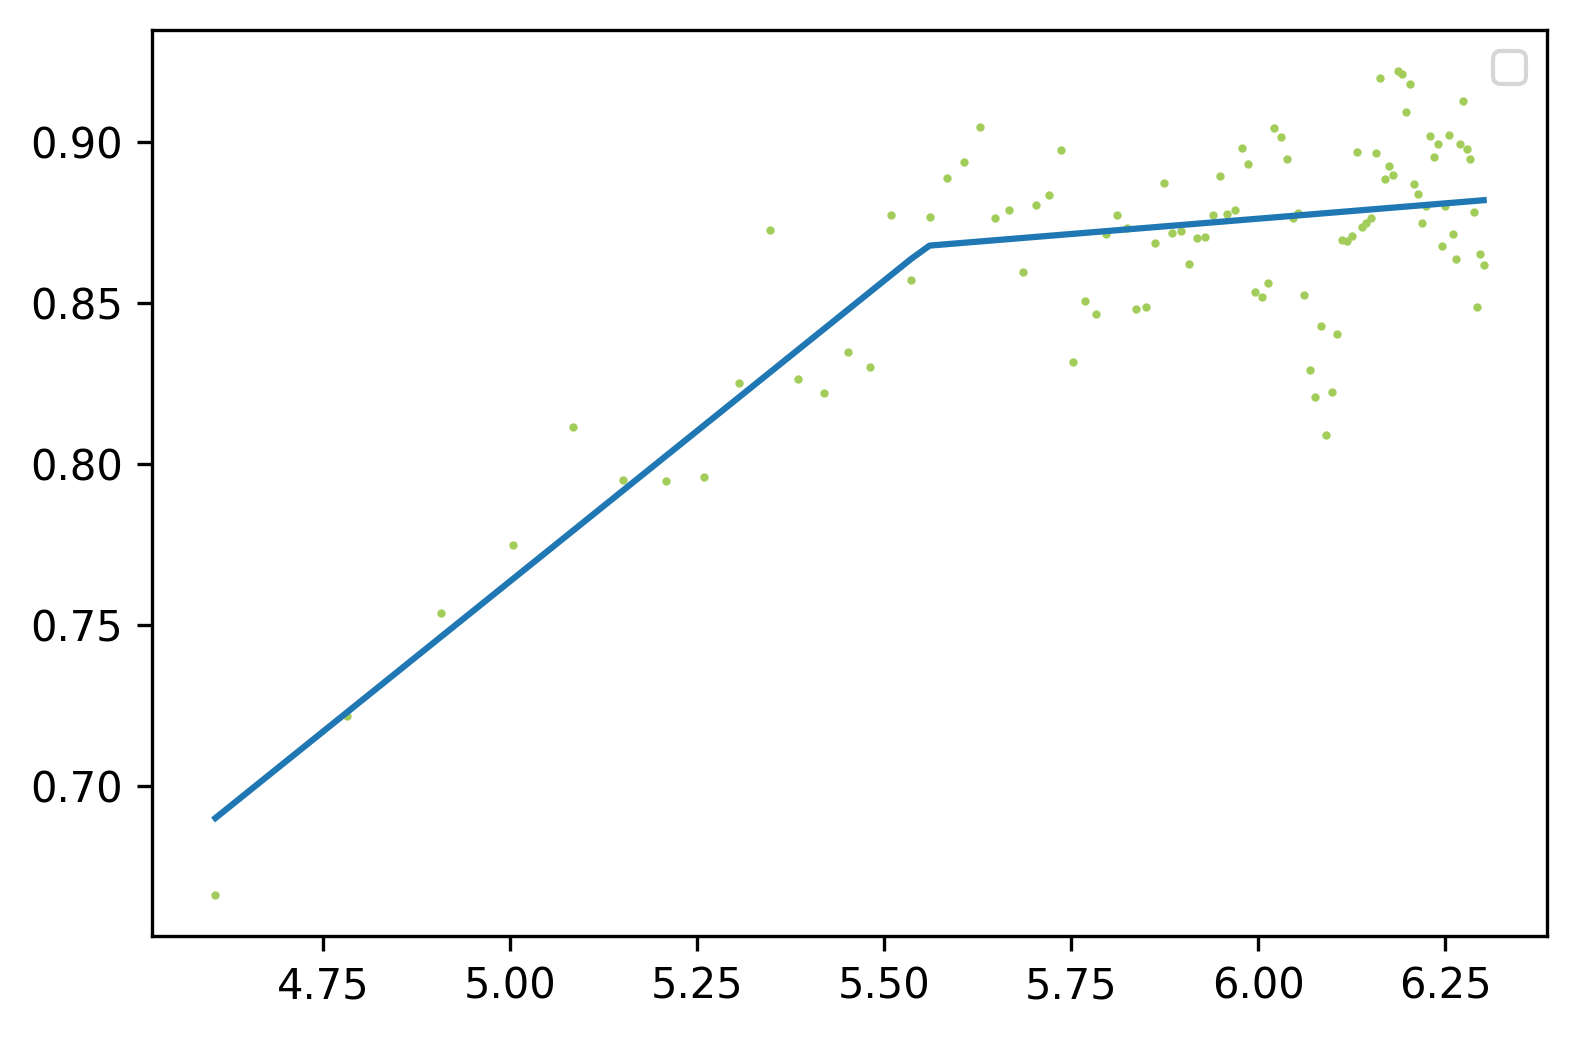

In [72]:
t = 2000000
time= np.linspace(1,t,t//steps)
tlog = [np.log10(time[i]) for i in range(2,t//steps)]
meanofwlog = [np.log10(meanofw[i]) for i in range(2,t//steps)]
plt.figure(dpi=300)
plt.scatter(tlog,meanofwlog,s=[1],color ='#A2CD5A')                     #plotting standard deviation(t) in different times.


#plt.plot(t, p(t),color='#68228B',linewidth=0.8, label=f'$y = {round(popt[0],6)} {round(popt[1],6):+}$')     #popt[0] is the slope and popt[1] is the intercept
plt.legend()
ax.set_xlabel(f't')
ax.set_ylabel(f'w(t)')
ax.set_aspect('auto')
#plt.savefig('line1', dpi=600)

# initialize piecewise linear fit with tlog and meanofwlog
my_pwlf = pwlf.PiecewiseLinFit(tlog, meanofwlog)

# fit the data for two line segments
res = my_pwlf.fit(2)

# predicting for the determined  break points
yHat = my_pwlf.predict(tlog)
plt.plot(tlog, yHat, "-")
breaks = my_pwlf.fit_breaks                 #finding where the new slope begins

print("start and end x of fitted lines are:" + str(breaks))
slopes = my_pwlf.calc_slopes()              #calculating the slopes
print("the slopes fitted lines are:" + str(slopes))
print( "y of break point is" + str(my_pwlf.predict(breaks[1])))
ax = plt.gca()
plt.savefig('variancelowsit2', dpi=300)

plt.show()

In [79]:
z = breaks[1]/L
beta = slopes[0]
alpha = beta * z
print("z = " + str(z))
print("beta = "+ str(beta))
print("alpha = "+ str(alpha))

z = 0.027789387288966474
beta = 0.1870030824310531
alpha = 0.005196701081907056
